# <div style="text-align: center"> COVID-19: A Fight Against Time </b><br>

<img src='covid-19-image.png'>

                                           Image source: qualitrolcorp

### Contents:
- [Problem Statement](#Problem-Statement)
- [Data Understanding](#Data-Understanding)
- [Dataset Description](#Dataset-Description)
- [Data Preparation](#Data-Preparation)
- [Data Visualization](#Data-Visualization)
- [Data Modeling](#Data-Modeling)
- [Evaluation](#Evaluation)
- [Conclusion](#Conclusion)

## The CRISP Process Framework

In this project, the CRross Industry Standard Process (CRISP) framework will be implemented to carry out all the steps involved in the project. The framework was modified to suit the purposes of our project. In the first stage, the problem statement will be identified and described. In the second stage, the data that can provide a solution to our problem will be collected and preprocessed. In the third stage, the data will be explored and examined further to prepare it for modeling. In the fourth stage, the data will be modeled. In the fifth stage, the results of the model will be evaluated and used to solve our problem.

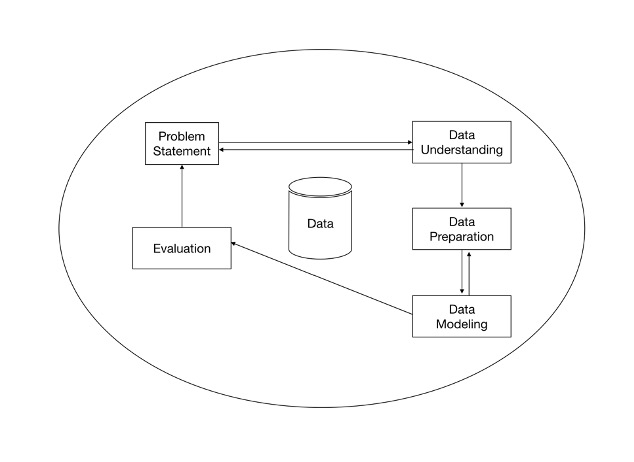
         
         The CRISP Process Framework of Project 4 (COVID-19 hackathon) (based on Mamoor, 2020)



## Introduction
COVID-19 is “a newly discovered coronavirus that infects humans and whose [rapid] spread has [led] to a global pandemic with zero available therapeutic strategies” (Mamoor, 2020, p. 5).

## Problem Statement
To explore how the outbreak of COVID-19 has spread around the world in such a short time and try to predict how it will continue to spread in order to provide insights to help combat the disease.

## Methodology

Model the data using time series. 

## Brianstorming Ideas:
- show the rate of spread for each country over time
- visualize global cases
- visualize the spread of COVID-19 on Saudi dataset
- how the virus spread in terms of time and place
- use time series model
- predict the number of deaths and recovered cases
- for uncommon results, maybe check outside research to explain
- compare SARS with COVID-19

try to predict how it will continue to spread in order to provide insights to help combat the disease.

# Data Understanding
In this section, a complete overview of the data is provided, such as the number of variables, missing percentages, data size, and column types.

### Dataset Description

The 'covid_19_clean_complete' file contains the cumulative count of confirmed, death and recovered cases of COVID-19 from different countries from 22nd January 2020.

###### Description of Columns:
    
- *Province/State:* contains the provinces and states that are affected by the virus.
- *Country/Region:* contains the countries and regions that are affected by the virus.
- *Lat:* contains the latitude of the location.
- *Long:* contains the longitude of the location.
- *Date:* contains the date of cumulative report.
- *Confirmed:* contains cumulative number of confirmed cases till this day.
- *Deaths:* contains cumulative number of deaths till this day.
- *Recovered:* contains cumulative number of recovered cases till this day.

In [62]:
import pandas as pd
import numpy as np
import itertools
import datetime
from pandas_profiling import ProfileReport
# Manipulating data and basic python libraries

import sklearn
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
# Preprocessing data and metrics for error evaluation

import tensorflow as tf

from tensorflow.keras.models import Sequential
from  tensorflow.keras.layers import Dense, Dropout, Activation, LSTM, ReLU
from  tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
# Tensorflow as for deep learning backend

from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Statistical modeling using Arima

import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots


import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette = 'Dark2',style='dark',font=['simhei', 'Arial'])
# Visualization

import warnings
warnings.simplefilter('ignore')


plt.style.use('seaborn-ticks')
# print(plt.style.available)


In [63]:
situation_reports = pd.read_csv('covid_19_clean_complete.csv')
saudi_data = pd.read_csv('New_Saudi_Cities_COVID-19.csv')

In [64]:
# Checking the dataset
situation_reports.head(2)

Province/State Country/Region      Lat     Long     Date  Confirmed  Deaths  \
0            NaN    Afghanistan  33.0000  65.0000  1/22/20          0       0   
1            NaN        Albania  41.1533  20.1683  1/22/20          0       0   

   Recovered  
0          0  
1          0

In [65]:
# Checking the size of the dataset
situation_reports.shape

(18105, 8)

In [66]:
# Checking the type of the dataset
situation_reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18105 entries, 0 to 18104
Data columns (total 8 columns):
Province/State    5538 non-null object
Country/Region    18105 non-null object
Lat               18105 non-null float64
Long              18105 non-null float64
Date              18105 non-null object
Confirmed         18105 non-null int64
Deaths            18105 non-null int64
Recovered         18105 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB


In [67]:
# Checking the type of the dataset
situation_reports.describe()

Lat          Long      Confirmed        Deaths     Recovered
count  18105.000000  18105.000000   18105.000000  18105.000000  18105.000000
mean      21.909527     23.249651     637.309473     26.556531    180.923999
std       24.446700     71.107940    5804.439052    337.492225   2381.242253
min      -41.454500   -135.000000       0.000000      0.000000      0.000000
25%        7.946500    -19.020800       0.000000      0.000000      0.000000
50%       23.700000     20.939400       0.000000      0.000000      0.000000
75%       41.295600     85.240100      39.000000      0.000000      1.000000
max       71.706900    178.065000  213372.000000  13155.000000  63326.000000

In [68]:
# Checking the columns of the dataset
situation_reports.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [69]:
# Looking closely at the dataset
profile_report = ProfileReport(situation_reports, title='Profile Report', html={'style':{'full_width':True}})
profile_report.to_notebook_iframe()

In [70]:
situation_reports.isnull().sum().sum()

12567

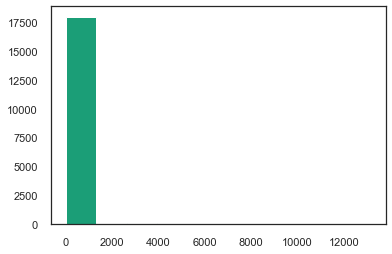

In [71]:
# Checking distribution of 'Deaths' column
# The data is skewed 
plt.hist(situation_reports['Deaths'])
plt.show()

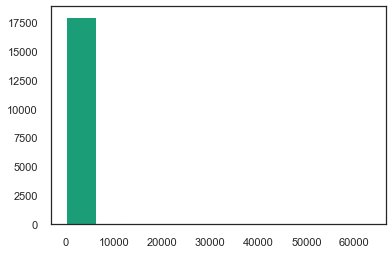

In [72]:
# Checking distribution of 'Recovered' column
# The data is skewed 
plt.hist(situation_reports['Recovered'])
plt.show()

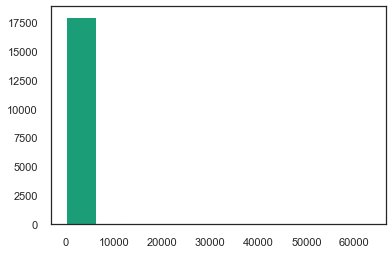

In [73]:
# Checking distribution of 'Recovered' column
# The data is skewed 
plt.hist(situation_reports['Recovered'])
plt.show()

# Data Preparation

In [74]:
# Converting the date to datetime type
situation_reports['Date'] = situation_reports['Date'].apply(pd.to_datetime)

In [75]:
# Sorting the data by date  
situation_reports.sort_values(by = 'Date',inplace= True)

In [76]:
# Setting the index
situation_reports.set_index('Date',inplace= True)

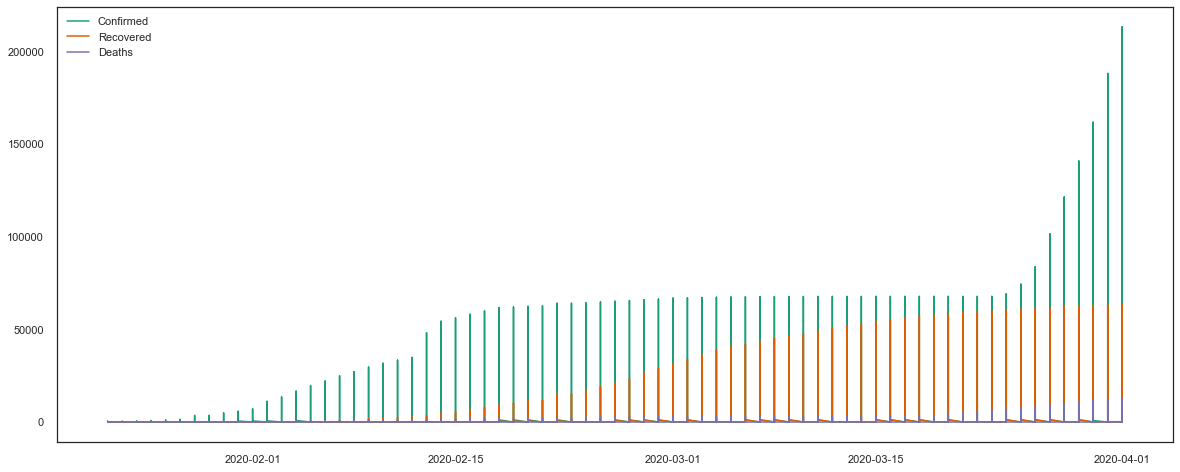

In [77]:
# Plotting the data by date
plt.figure(figsize=(20,8))
plt.plot(situation_reports[['Confirmed','Recovered','Deaths']]);
plt.legend(['Confirmed','Recovered','Deaths'])

### Outliers Analysis
###### Discovering Outliers with Visualization Tools

Box plots are used to depict groups of numerical data graphically through their quartiles. Outliers are plotted as individual points.

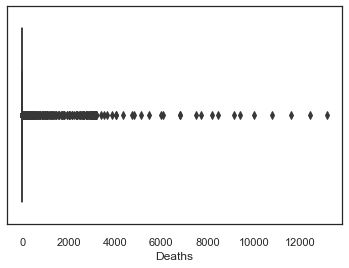

In [78]:
# Checking outliers in 'Deaths' column 
sns.boxplot(x=situation_reports['Deaths'])

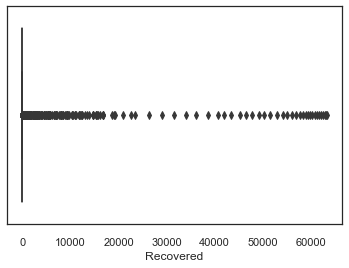

In [79]:
# Checking outliers in ''Recovered' column 
sns.boxplot(x=situation_reports['Recovered'])

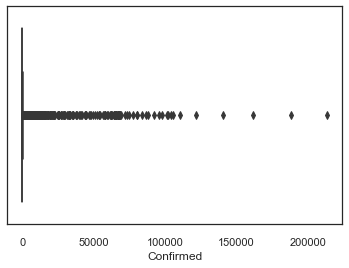

In [80]:
# Checking outliers in 'Confirmed' column
sns.boxplot(x=situation_reports['Confirmed'])

### Calculating and Visualizing Missing Data

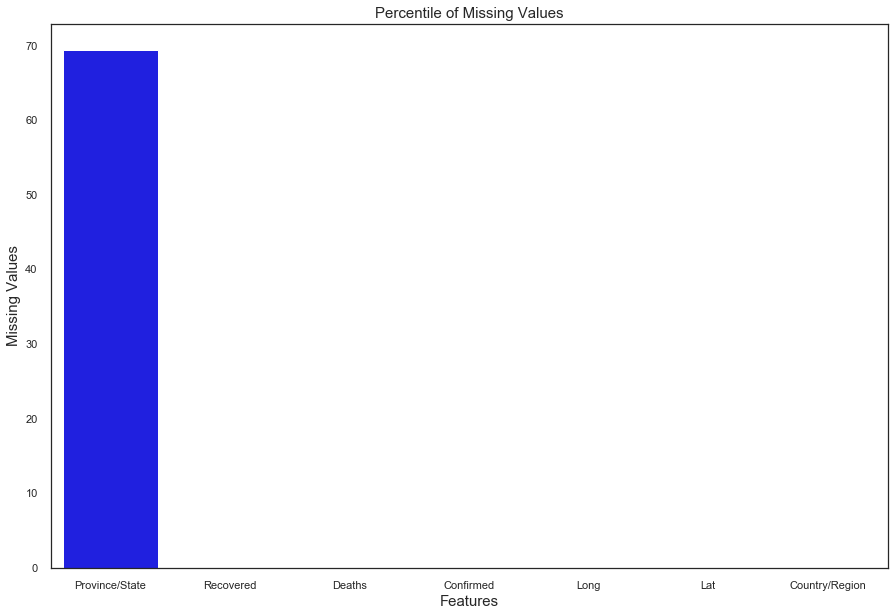

In [81]:
# Percentile of missing values
missing_values_count = (situation_reports.isnull().sum()/situation_reports.isnull().count()*100).sort_values(ascending=False)
plt.figure(figsize=(15,10))
plt.xlabel('Features', fontsize=15)
plt.ylabel('Missing Values', fontsize=15)
plt.title('Percentile of Missing Values', fontsize=15)
sns.barplot(missing_values_count[:10].index.values, missing_values_count[:10], color ='blue');

In [82]:
# Count and percentile of missing data
train_missing = situation_reports.isnull().sum()
train_total = situation_reports.isnull().sum().sort_values(ascending=False)
train_percent = (situation_reports.isnull().sum() * 100 /situation_reports.isnull().count()).sort_values(ascending=False)
train_missing_data = pd.concat([train_total, train_percent], axis=1, keys=['Total', 'Percent'])
train_missing_data.head(3)

Total    Percent
Province/State  12567  69.411765
Recovered           0   0.000000
Deaths              0   0.000000

## Imputation

Imputation is performed to preserve the size of the data and improve the model’s performance.

In [83]:
# Dropping 'provice/state' column as we are exploring international figures
# This will reduce granularity; reduce overfitting
situation_reports.drop(columns=['Province/State'], inplace=True)

In [84]:
# Checking that 'provice/state' column was dropped
situation_reports.head(2)

Country/Region   Lat  Long  Confirmed  Deaths  Recovered
Date                                                               
2020-01-22    Afghanistan  33.0  65.0          0       0          0
2020-01-22     Montenegro  42.5  19.3          0       0          0

# Data Visualization 

In [85]:
# Displaying data in a line and area plots
rest = situation_reports[situation_reports['Country/Region'] != 'China']
rest_grouped = rest.groupby('Date')['Confirmed','Recovered','Deaths'].sum().reset_index()
temp = rest_grouped.melt(id_vars="Date", value_vars=['Confirmed','Recovered','Deaths'],
                 var_name='case', value_name='count')
fig = px.line(temp, x="Date", y="count", color='case',
             title='Confirmed Cases of COVID-19 without China: Line Plot', color_discrete_sequence = ['cyan', 'red', 'orange'])
fig.show()
fig = px.area(temp, x="Date", y="count", color='case',
             title='Confirmed Cases of COVID-19 without China: Area Plot', color_discrete_sequence = ['cyan', 'red', 'orange'])
fig.show();

In [86]:
situation_reports.reset_index(inplace = True)
last_date= situation_reports[situation_reports['Date']== '2020-04-01 00:00:00']

In [87]:
last_date.head()

Date Country/Region      Lat      Long  Confirmed  Deaths  \
17850 2020-04-01        Nigeria   9.0820    8.6753        174       2   
17851 2020-04-01          Niger  17.6078    8.0817         74       5   
17852 2020-04-01      Nicaragua  12.8654  -85.2072          5       1   
17853 2020-04-01    New Zealand -40.9006  174.8860        708       1   
17854 2020-04-01    Netherlands  52.1326    5.2913      13614    1173   

       Recovered  
17850          9  
17851          0  
17852          0  
17853         83  
17854        250

In [88]:
confirmed_cases =last_date[['Country/Region','Confirmed','Deaths','Recovered']]

In [89]:
confirmed_cases.sort_values(by='Confirmed',ascending=False,inplace=True)

In [90]:
top_10 = confirmed_cases.head(10)

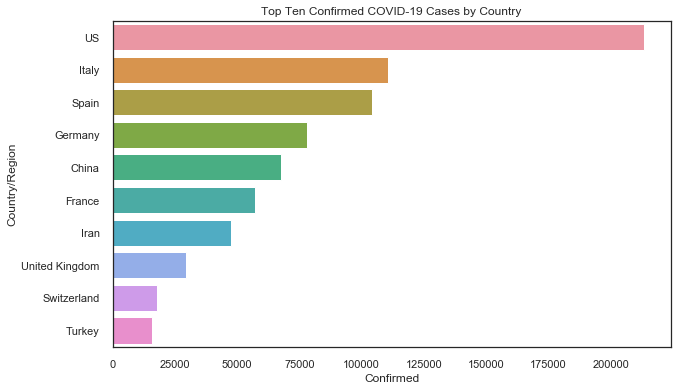

In [91]:
# Displaying top ten confirmed COVID-19 cases by country
plt.figure(figsize = (10,6))
sns.barplot(x=top_10['Confirmed'],y=top_10['Country/Region'])
plt.title("Top Ten Confirmed COVID-19 Cases by Country");

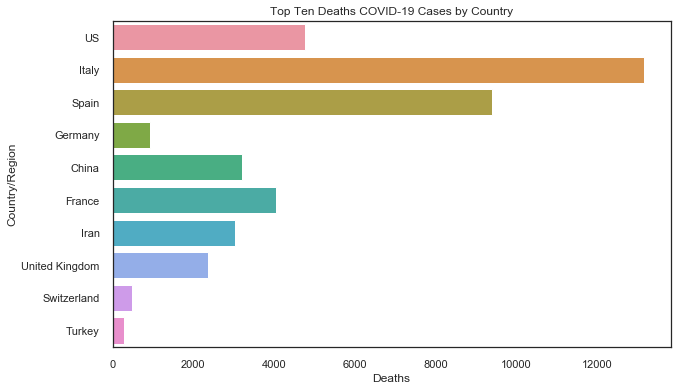

In [92]:
# Displaying top ten deaths COVID-19 cases by country
plt.figure(figsize = (10,6))
sns.barplot(x=top_10['Deaths'],y=top_10['Country/Region'])
plt.title("Top Ten Deaths COVID-19 Cases by Country");

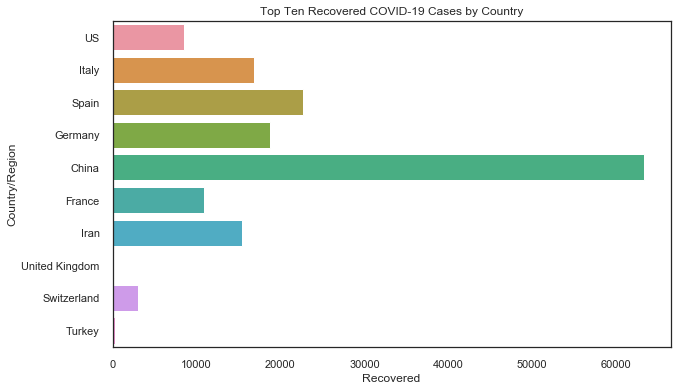

In [93]:
# Displaying top ten recovered COVID-19 cases by country
plt.figure(figsize = (10,6))
sns.barplot(x=top_10['Recovered'],y=top_10['Country/Region'])
plt.title("Top Ten Recovered COVID-19 Cases by Country");

In [94]:
# Displaying spread of COVID-19 over time across countries
formated_gdf = situation_reports.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['Date'] = pd.to_datetime(formated_gdf['Date'])
formated_gdf['Date'] = formated_gdf['Date'].dt.strftime('%m/%d/%Y')
formated_gdf['size'] = formated_gdf['Confirmed'].pow(0.3)
fig = px.scatter_geo(formated_gdf, locations="Country/Region", locationmode='country names', 
                     color="Confirmed", size='size', hover_name="Country/Region", 
                     range_color= [0, max(formated_gdf['Confirmed'])+2], animation_frame="Date", 
                     title='Spread of COVID-19 Over Time Across Countries')
fig.update(layout_coloraxis_showscale=False)
fig.show();

In [95]:
# Displaying spread of COVID-19 over time in Saudi Arabia
fig = px.scatter_geo(saudi_data, locationmode='country names',
color='Cases', hover_name='City', lat='Lat', lon='Long',
range_color= [0, max(saudi_data['Cases'])+2], animation_frame='Date',
title='The Spread of COVID-19 Over Time in Saudi Arabia',scope=(str ('asia')))
fig.update(layout_coloraxis_showscale=False)
fig.show();

In [96]:
# Exploring the data of Saudi Arabia 
new = situation_reports.loc[situation_reports['Country/Region'].str.contains('Saudi' , na=False)]
new.head(2)

Date Country/Region   Lat  Long  Confirmed  Deaths  Recovered
63  2020-01-22   Saudi Arabia  24.0  45.0          0       0          0
349 2020-01-23   Saudi Arabia  24.0  45.0          0       0          0

In [97]:
# Checking the data
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 63 to 17945
Data columns (total 7 columns):
Date              71 non-null datetime64[ns]
Country/Region    71 non-null object
Lat               71 non-null float64
Long              71 non-null float64
Confirmed         71 non-null int64
Deaths            71 non-null int64
Recovered         71 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 4.4+ KB


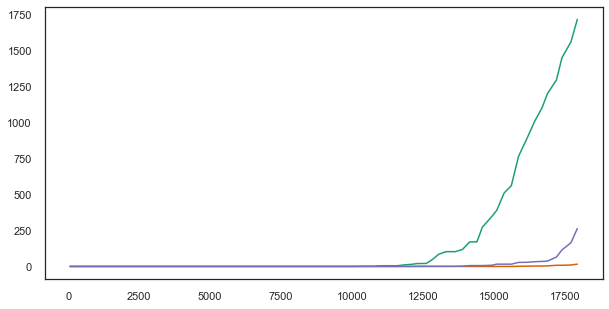

In [98]:
# Displaying cases by day
plt.figure(figsize=(10,5))
plt.plot(new[['Confirmed','Deaths','Recovered']]);

In [99]:
# The function is used to set Confirmed cases and select Country 
def country_case(df,country,case = 'Confirmed'):
    data = df[case].loc[df['Country/Region'].str.contains(country, na =False)]
    return pd.DataFrame(data)

# Data Modeling

In this section, an ARIMA model will be created to predict the spread of COVID-19 in Saudi Arabia.

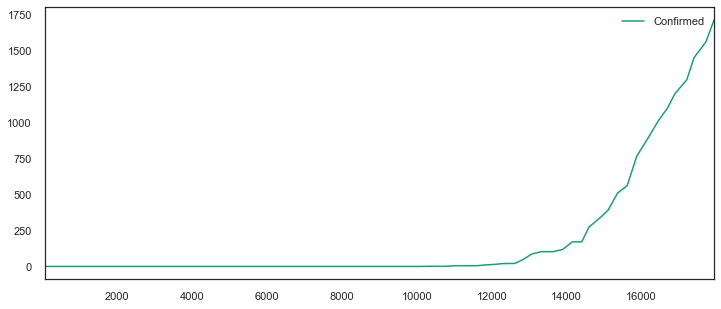

In [100]:
saudi_data = country_case(situation_reports,'Saudi')
saudi_data.plot(figsize=(12, 5));

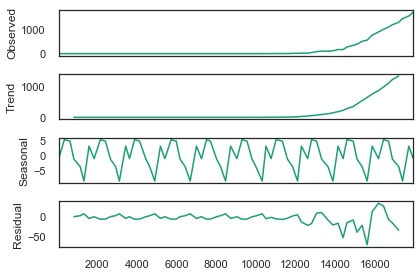

In [101]:
result = sm.tsa.seasonal_decompose(saudi_data,freq=7).plot()

In [102]:
# Checking stationarity using adfuller
result = adfuller(saudi_data['Confirmed'])
result

(-2.9632943822060245,
 0.03846734901418322,
 12,
 58,
 {'1%': -3.548493559596539,
  '5%': -2.912836594776334,
  '10%': -2.594129155766944},
 522.0658940350435)

In [103]:
# Auto-Correlation and partial auto-correlation plots
def corr(ts):
    plot_acf(ts,lags=12,title="ACF")
    plot_pacf(ts,lags=12,title="PACF")
    

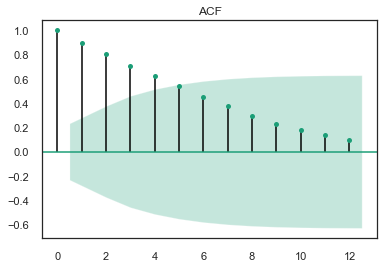

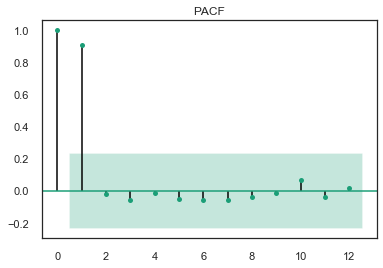

In [104]:
corr(saudi_data)

In [105]:
saudi_data.head()

Confirmed
63            0
349           0
635           0
828           0
1145          0

In [106]:
# Building Functions for ARIMA Model 
# Checking The Min and Max
print('  Max Date : {} "\n" Min Date : {}'.format(saudi_data.index.max(), saudi_data.index.min()))

  Max Date : 17945 "
" Min Date : 63


In [107]:
# Mean absolute percentage error
def mape(y, y_pred): 
    y, y_pred = np.array(y), np.array(y_pred)
    return np.mean(np.abs((y - y_pred) / y)) * 100

def split(ts):
    #splitting 85%/15% because of little amount of data
    size = int(len(ts) * 0.80)
    train= ts[:size]
    test = ts[size:]
    return(train,test)


def arima(ts,test):
    p=d=q=range(0,20)
    a=99999
    pdq=list(itertools.product(p,d,q))
    
    # Determining the best parameters
    for var in pdq:
        try:
            model = ARIMA(ts, order=var)
            result = model.fit()
#                AIC (Autoselection)
            if (result.aic<=a) :
                a=result.aic
                param=var
        except:
            continue
            
    # Modeling the data
    model = ARIMA(ts, order=param)
    result = model.fit()
    result.plot_predict(start=int(len(ts) * 0.7), end=int(len(ts) * 1.2))
    
    pred=result.forecast(steps=len(test))[0]
    plot_acf(result.resid)
    # Plotting results
    predict = test.copy()
    predict.Confirmed = pred
    
    f,ax=plt.subplots()
    plt.plot(predict,c='green', label= 'predictions')
    plt.plot(test, c='red',label='real values')
    plt.legend()
    plt.plot(figsize=(20, 5))
    plt.title('True vs predicted values')
    # Printing the error metrics
    print(result.summary())        
    print('\nMean absolute error: %f'%mean_absolute_error(test,pred))
    print('\nMean absolute percentage error: %f'%mape(test,pred))
    print('\nMSE statsmodels :%f'%result.sigma2)
    return (pred)



#### USA Data

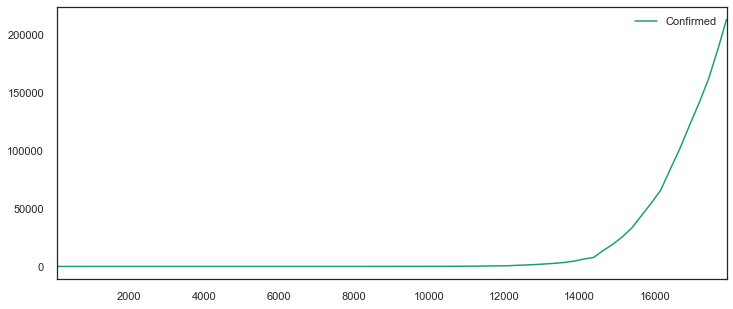

In [108]:
country_case(situation_reports,'US').plot(figsize=(12, 5));

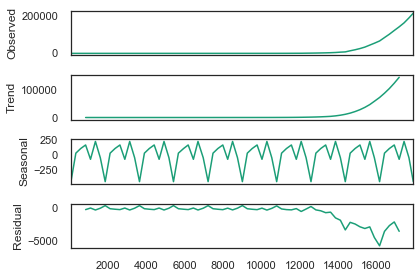

In [109]:
result = sm.tsa.seasonal_decompose(country_case(situation_reports,'US'),freq=7).plot()

# Evaluation

#### Observations

- At an early stage, COVID-19 seemed to be only in China and its neighboring countries.
- Then it quickly spread to Europe, US, and other countries.
- In West Asia, especially Iran and Iraq, the virus spread quickly at the end of February, while the virus was spreading rapidly in Italy.
- Around March 5, the virus started spreading in Europe. On March 9, Italy imposed a national quarantine. 
- According to the data so far, the US, UK, Spain, Italy, Germany, and France are still in the midst of a major outbreak.
- In Saudi Arabia, the virus started spreading on March 5. A far-reaching lockdown and airport closures slowed down the virus but did not stop it from spreading. 


# Conclusion

Based on outside research, but proven by the data, the spread of COVID-19 declined when countries implemented restrictive quarantines and lockdowns inhibiting the movement of their citizens(LaiApril, 2020). 

## References:

- Mamoor, S., 2020. FBXL8 is differentially expressed and transcriptionally induced in MERS coronavirus infection.
- LaiApril, R., 2020. Are Countries Flattening the Curve for the Coronavirus?. The New York Time. Accessed on April 5th, 2020: (https://www.nytimes.com/interactive/2020/04/03/world/coronavirus-flatten-the-curve-countries.html).
- Putatunda, S., Rama, K., Ubrangala, D. and Kondapalli, R., 2019. SmartEDA: An R Package for Automated Exploratory Data Analysis. arXiv preprint arXiv:1903.04754.

# Group members: 
##### Khalid, Malak, Maram, Sara, Sarah